# Insertion-sort vs Counting-sort
L'obiettivo di questo esercizio è di confrontare i due algoritmi di ordinamento insertion sort e counting sort.
A questo proposito verrano generati dei test per valutarne le prestazioni e comprenderne vantaggi e svantaggi

## Spiegazione teorica del problema

* **Insertion-sort**: è un algoritmo che ordina l'array un elemento alla volta. Si inizia con il secondo elemento dell'array e si confronta con tutti gli elementi precedenti, spostando gli elementi più grandi fino a quando l'elemento giunge nella posizione corretta;
* **Counting-sort**: questo algoritmo conta il numero di occorrenze di ogni valore distinto nell'array e costruisce l'array ordinato basandosi su queste. L'idea è quella di utilizzare un array ausiliario per tenere traccia del conteggio di ciascun valore in un range di interi specificato. Dopo di che si usano le occorrenze per posizionare ciascun elemento nell'array di output.


### Assunti ed ipotesi

Quando un'array è ordinato in ordine inverso, e quindi ogni elemento deve essere spostato fino alla sua posizione corretta all'interno dell'array si ha il caso peggiore e quindi **insertion sort** ha una complessità temporale di $\Theta$(n<sup>2</sup>).

Dalla teoria sappiamo inoltre che questo risultato è ottenuto anche se l'array presenta un alto numero di elementi, quindi la complessià al caso medio sarà $\Theta$(n<sup>2</sup>)

Nel caso migliore, invece ha una complessità temporale di $\Theta$(n), che si verifica quando l'array è già ordinato o ha pochi elementi.

**Counting sort** per come abbiamo visto nella sezione precedente utilizza un array ausiliario per il conteggio delle occorrenze. Questo ci permette di ordinare senza confronti in tempo lineare ma necessità di memoria in più e questo dipende dal range di valori nell'array.
Quindi **counting sort** ha una complessità temporale lineare, $\Theta$(n + k), dove n è il numero di elementi nell'array e k è il range dei valori possibili.
Questo significa che se k è un O(n) allora la complessità di counting-sort è $\Theta$(n).

Di seguito una tabella riassuntiva dei risultati attesi dai diversi algoritmi nei vari casi.

&emsp;

| | Complessità caso migliore | Complessità caso medio |
|--- |:---: |:---: |
| **Insertion Sort** | $\Theta$(n) | $\Theta$(n<sup>2</sup>) |
| **Counting-sort**| $\Theta$(n+k) | $\Theta$(n+k) |

&emsp;

Per quanto visto sopra **insertion sort** è efficiente per piccoli insiemi di dati, mentre **counting sort** è più efficiente quando il range dei valori è relativamente piccolo rispetto al numero di elementi nell'array.
In sintesi ci aspettiamo dei tempi medi migliori da **counting sort**, a costo di aumentare la complessità spaziale.


## Documentazione del codice
In questa sezione è presente il codice python per implementare i due algoritmi. Non sono state create classi ma soltanto definiti i due metodi. Per entrambi gli algoritmi sono presenti degli esempi di utilizzo per mostrare il funzionamento degli algoritmi.

### Implementazione Insertion Sort

In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1

        arr[j + 1] = key

# Esempio di utilizzo
arr = [11, 1, 51, 2, 5, 3]
print("Array originale:", arr)
insertion_sort(arr)
print("Array ordinato:", arr)

Array originale: [11, 1, 51, 2, 5, 3]
Array ordinato: [1, 2, 3, 5, 11, 51]


### Implementazione Counting Sort

In [ ]:
def counting_sort(A):
    k = max(A)

    C = [0] * (k + 1)

    for num in A:
        C[num] += 1

    for i in range(1, k + 1):
        C[i] += C[i - 1]

    B = [0] * len(A)

    for j in range(len(A)):
      B[C[A[j]] - 1] = A[j]
      C[A[j]] -= 1

    return B

# Esempio di utilizzo
arr = [11, 1, 51, 2, 5, 3]
sorted_arr = counting_sort(arr)
print("Array originale:", arr)
print("Array ordinato:", sorted_arr)

Array originale: [11, 1, 51, 2, 5, 3]
Array ordinato: [1, 2, 3, 5, 11, 51]


## Esperimenti effettuati ed Analisi dei risultati


### Specifiche della piattaforma di test
Le specifiche hardware della macchina sono:
- **CPU**: Apple M1 8-core
- **RAM**: Micron 8 GB LPDDR4
- **SSD**: Apple 256GB

La piattaforma in cui il codice è stato scritto e testato è il notebook JupyterLab.
Il sistema operativo è MacOS sonoma 14.2

### Esperimenti condotti
Per sottolineare le differenze tra i due algoritmi sono stati utilizzati come dati array di dimensione crescente, riempiti con un valori interi casuali con un range da 0 a 100. Inoltre viene calcolato il tempo di esecuzione ogni 500 elementi inseriti.

Questo serve a mettere in evidenza l’andamento nel tempo degli algoritmi all'aumentare degli elementi nell'array.

Ciascun esperimento viene ripetuto 5 volte, dopo di che viene calcolata la media dei risultati. Alla
fine i dati vengono mostrati in tabelle e su dei grafici generati dai test stessi.



### Misurazioni
Per calcolare i tempi di esecuzione e la media degli esperimenti è stata utilizzata la libreria **timeit** di python in questo modo:


```
tempo_medio_esperimento = timeit.timeit(lambda: algoritmo(array.copy()), number=5)
```
Dove gli argomenti di timeit() sono:
 - lambda: algoritmo(arr.copy()) è una funzione lambda usata per creare un contesto di esecuzione per timeit, la quale chiama l'algoritmo implementato su una copia dell'array
 - il parametro number=5 che specifica che la funzione verrà eseguita 5 volte e verrà calcolato il tempo medio di esecuzione

Questa restituisce il tempo medio di un esperimento sull'algoritmo eseguito per 5 volte.


### Codice test
In questa sezione è presente il codice relativo agli esperimenti descritti precedentemente.
È interessante vedere come viene utilizzata la libreria **pandas** per la creazione e la formattazione delle tabelle:
 - **DataFrame** crea una tabella con due colonne (Dimensione array e Tempo di esecuzione medio), riempiendo le righe con il contenuto di *array_lenghts*, *counting_sort_times* e *insertion_sort_times*

 - **apply(lambda x: '{:.3e}'.format(x))** formatta i valori dei tempi di esecuzione in notazione scientifica con 3 cifre significative

 - **iloc[1:]** esclude la prima riga delle tabelle perchè il tempo relativo all'array di un solo elemento non è rilevante per questo esperimento

 - **style.set_properties({'text-align': 'center'})** centra il contenuto delle righe nelle tabelle


In [ ]:
import matplotlib.pyplot as plt
import timeit
import random
import pandas as pd

array_lengths = [1, 500, 1000, 1500, 2000, 2500, 3000]
counting_sort_times = []
insertion_sort_times = []
for length in array_lengths:

    arr = [random.randint(0, 100) for _ in range(length)]

    # calcolo tempi medi di esecuzione: Counting Sort
    counting_sort_time = timeit.timeit(lambda: counting_sort(arr.copy()), number=5)
    counting_sort_times.append(counting_sort_time)

    # calcolo tempi medi di esecuzione: Insertion Sort
    insertion_sort_time = timeit.timeit(lambda: insertion_sort(arr.copy()), number=5)
    insertion_sort_times.append(insertion_sort_time)

# preparazione e formattazione tabella: Counting Sort
data_counting = pd.DataFrame({'Dimensioni array': array_lengths, 'Tempo di esecuzione medio': counting_sort_times})
data_counting['Tempo di esecuzione medio'] = data_counting['Tempo di esecuzione medio'].apply(lambda x: '{:.3e}'.format(x))
data_counting = data_counting.iloc[1:]
data_counting = data_counting.style.set_properties(**{'text-align': 'center'})

# preparazione e formattazione tabella: Insertion Sort
data_insertion = pd.DataFrame({'Dimensioni array': array_lengths, 'Tempo di esecuzione medio': insertion_sort_times})
data_insertion['Tempo di esecuzione medio'] = data_insertion['Tempo di esecuzione medio'].apply(lambda x: '{:.3e}'.format(x))
data_insertion = data_insertion.iloc[1:]
data_insertion = data_insertion.style.set_properties(**{'text-align': 'center'})

### Risultati degli esperimenti
Qui vengono mostrati i risultati calcolati sopra, sia in forma tabellare che con grafici.
Le tabelle mostrano la relazione fra il numero di elementi negli array ed il tempo impiegato ad eseguire i due algoritmi.
Nei grafici vediamo invece l'andamento nel tempo.


#### Insertion sort
Come possiamo osservare dai dati riportati nella tabella i tempi sembrano crescere in maniera quadratica. Questo è confermato dal grafico, dove si vede più chiaramente che fino a 1000 elementi si ha un andamento del tempo lineare rispetto al numero degli elementi e dopo di che quadratico.

In [ ]:
data_insertion

,Dimensioni array,Tempo di esecuzione medio
1,500,1.452e-01
2,1000,2.331e-01
3,1500,5.132e-01
4,2000,8.883e-01
5,2500,1.411e+00
6,3000,2.049e+00


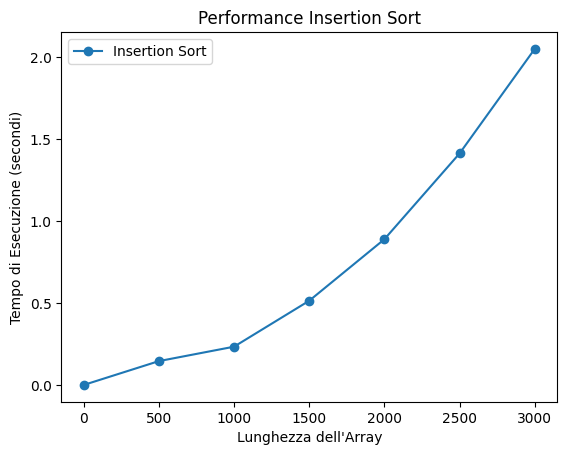

In [ ]:
plt.plot(array_lengths, insertion_sort_times, label='Insertion Sort', marker='o')
plt.title('Performance Insertion Sort')
plt.xlabel('Lunghezza dell\'Array')
plt.ylabel('Tempo di Esecuzione (secondi)')
plt.legend()
plt.show()

#### Counting sort
Anche in questo caso i tempi riportati in tabella ci suggeriscono che si ha una crescita lineare e questo è confermato dal grafico.

Oltre alla differenza tra gli andamenti dei due grafici, è importante notare che la maggiore efficienza di **counting sort** è confermata anche da tempi misurati, osservandoli si può notare che differiscono di almeno 2 o 3 ordini di grandezza.

In [ ]:
data_counting

,Dimensioni array,Tempo di esecuzione medio
1,500,2.235e-03
2,1000,1.617e-03
3,1500,2.589e-03
4,2000,3.208e-03
5,2500,3.905e-03
6,3000,4.679e-03


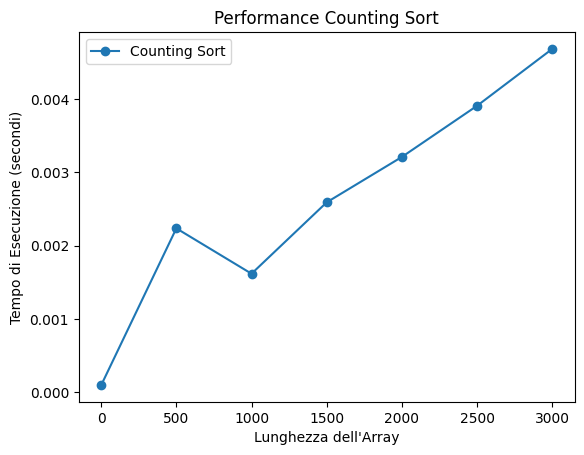

In [ ]:
plt.plot(array_lengths, counting_sort_times, label='Counting Sort', marker='o')
plt.title('Performance Counting Sort')
plt.xlabel('Lunghezza dell\'Array')
plt.ylabel('Tempo di Esecuzione (secondi)')
plt.legend()
plt.show()

## Conclusioni

I risultati degli esperimenti ci hanno portato al risultato ipotizzato cioè che counting sort è più efficiente di insertion sort quando il numero di elementi da ordinare diventa grande.